In [15]:
import numpy as np
import pandas as pd

import string
import importlib

import russia_df_utils
importlib.reload(russia_df_utils)
from russia_df_utils import get_uncategorized_RT_df_rows

import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize          
from nltk.stem import WordNetLemmatizer 
from nltk.tokenize import TweetTokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from gensim import corpora, models, similarities, matutils
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import NMF
from sklearn.metrics import silhouette_score

import matplotlib.pyplot as plt
import matplotlib as mpl

import seaborn as sns
sns.set()

%matplotlib inline
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
number_of_topics = 15

In [3]:
clustered_tweets = get_uncategorized_RT_df_rows()
clustering_text = clustered_tweets['processed_text']

In [4]:
stop_words = set(stopwords.words('english'))
stop_words.remove('not')
stop_words.remove('all')
count_vectorizer = CountVectorizer(stop_words=stop_words, ngram_range=(1,2), min_df=10)
count_vectorized_tweets = count_vectorizer.fit_transform(clustering_text.values)
corpus = matutils.Sparse2Corpus(count_vectorized_tweets.transpose())
id2word_lda = dict((v, k) for k, v in count_vectorizer.vocabulary_.items())


In [5]:
lda = models.LdaMulticore(workers=3, corpus=corpus, num_topics=number_of_topics, id2word=id2word_lda, passes=150)

2018-03-07 16:57:30,006 : INFO : using symmetric alpha at 0.06666666666666667
2018-03-07 16:57:30,008 : INFO : using symmetric eta at 0.06666666666666667
2018-03-07 16:57:30,015 : INFO : using serial LDA version on this node
2018-03-07 16:57:34,313 : INFO : running online LDA training, 15 topics, 150 passes over the supplied corpus of 147723 documents, updating every 6000 documents, evaluating every ~60000 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-07 16:57:34,315 : INFO : training LDA model using 3 processes
2018-03-07 16:57:34,371 : INFO : PROGRESS: pass 0, dispatched chunk #0 = documents up to #2000/147723, outstanding queue size 1
2018-03-07 16:57:34,637 : INFO : PROGRESS: pass 0, dispatched chunk #1 = documents up to #4000/147723, outstanding queue size 2
2018-03-07 16:57:34,646 : INFO : PROGRESS: pass 0, dispatched chunk #2 = documents up to #6000/147723, outstanding queue size 3
2018-03-07 16:57:35,004 : INFO : PROGRESS: pass 0, dispatched chunk #3

In [6]:
top_topics = lda.top_topics(corpus)

2018-03-07 19:04:08,539 : INFO : CorpusAccumulator accumulated stats from 1000 documents
2018-03-07 19:04:08,547 : INFO : CorpusAccumulator accumulated stats from 2000 documents
2018-03-07 19:04:08,556 : INFO : CorpusAccumulator accumulated stats from 3000 documents
2018-03-07 19:04:08,564 : INFO : CorpusAccumulator accumulated stats from 4000 documents
2018-03-07 19:04:08,572 : INFO : CorpusAccumulator accumulated stats from 5000 documents
2018-03-07 19:04:08,580 : INFO : CorpusAccumulator accumulated stats from 6000 documents
2018-03-07 19:04:08,588 : INFO : CorpusAccumulator accumulated stats from 7000 documents
2018-03-07 19:04:08,596 : INFO : CorpusAccumulator accumulated stats from 8000 documents
2018-03-07 19:04:08,604 : INFO : CorpusAccumulator accumulated stats from 9000 documents
2018-03-07 19:04:08,613 : INFO : CorpusAccumulator accumulated stats from 10000 documents
2018-03-07 19:04:08,621 : INFO : CorpusAccumulator accumulated stats from 11000 documents
2018-03-07 19:04:08

In [7]:
top_topics

[([(0.12154821, 'realdonaldtrump'),
   (0.027300293, 'hillaryclinton'),
   (0.015325606, 'vote'),
   (0.014618145, 'president'),
   (0.014056505, 'obama'),
   (0.013264575, 'not'),
   (0.012718129, 'maga'),
   (0.0066072973, 'media'),
   (0.005163523, 'says'),
   (0.0048845396, 'supporters'),
   (0.004762312, 'america'),
   (0.004718244, 'voting'),
   (0.0046616415, 'potus'),
   (0.004172008, 'all'),
   (0.0041682823, 'rally'),
   (0.0041609113, 'election'),
   (0.0040300596, 'gop'),
   (0.0040157987, 'trump2016'),
   (0.003888756, 'trumptrain'),
   (0.0037795196, 'americans')],
  -4.104427303411317),
 ([(0.09332552, 'hillaryclinton'),
   (0.019058531, 'realdonaldtrump'),
   (0.010716022, 'news'),
   (0.010464353, 'campaign'),
   (0.010254444, 'via'),
   (0.009955266, 'bill'),
   (0.009459917, 'wikileaks'),
   (0.009451497, 'fbi'),
   (0.009363206, 'house'),
   (0.0073872893, 'cnn'),
   (0.0071822633, 'white'),
   (0.007047399, 'dnc'),
   (0.006646591, 'russia'),
   (0.006514819, 'fake

<Container object of 20 artists>

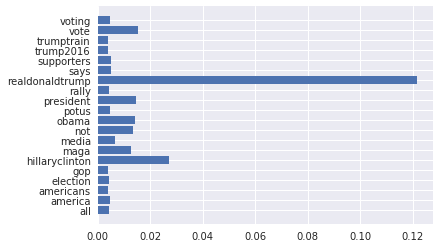

In [8]:
labels = [x[1] for x in top_topics[0][0]]
values = [x[0] for x in top_topics[0][0]]
#top_topics[0][0]


In [9]:
lda_corpus = lda[corpus]
lda_docs = [doc for doc in lda_corpus]
lda_docs[0:2]

[[(3, 0.11845627), (6, 0.1497586), (11, 0.33766553), (12, 0.3207862)],
 [(0, 0.013333353),
  (1, 0.013333334),
  (2, 0.01333337),
  (3, 0.013333334),
  (4, 0.013333334),
  (5, 0.013333437),
  (6, 0.013333334),
  (7, 0.81333315),
  (8, 0.013333334),
  (9, 0.013333334),
  (10, 0.01333335),
  (11, 0.01333334),
  (12, 0.013333337),
  (13, 0.013333367),
  (14, 0.013333334)]]

In [10]:
lda_docs_to_train = np.zeros((len(lda_docs), number_of_topics))

In [11]:
for idx, doc in enumerate(lda_docs):
    for topic, prob in doc:
        lda_docs_to_train[idx][topic] = prob
        

In [12]:
SSEs = []
k_range = range(3,30)
for k in k_range:
    print('KM with {} clusters.'.format(k))
    model = KMeans(n_clusters=k)
    model.fit(lda_docs_to_train)
    labels = model.labels_
    clustered_tweets['cluster_k{}'.format(k)] = labels
    clustered_tweets.to_csv('../csvs/km_rt_lda_15_150passes.csv')
    #Sil_coefs.append(silhouette_score(vectorized_tweets, labels, metric='euclidean'))
    SSEs.append(model.inertia_) 

KM with 3 clusters.
KM with 4 clusters.
KM with 5 clusters.
KM with 6 clusters.
KM with 7 clusters.
KM with 8 clusters.
KM with 9 clusters.
KM with 10 clusters.
KM with 11 clusters.
KM with 12 clusters.
KM with 13 clusters.
KM with 14 clusters.
KM with 15 clusters.
KM with 16 clusters.
KM with 17 clusters.
KM with 18 clusters.
KM with 19 clusters.
KM with 20 clusters.
KM with 21 clusters.
KM with 22 clusters.
KM with 23 clusters.
KM with 24 clusters.
KM with 25 clusters.
KM with 26 clusters.
KM with 27 clusters.
KM with 28 clusters.
KM with 29 clusters.


In [16]:
Sil_coefs = []
#clustered_tweets = pd.read_csv('../csvs/km_lda.csv')
#k_range = range(3,40)
for k in k_range:
    print(k)
    Sil_coefs.append(silhouette_score(count_vectorized_tweets, 
                                      clustered_tweets['cluster_k{}'.format(k)],
                                      metric='cosine',
                                     sample_size=10000))

3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


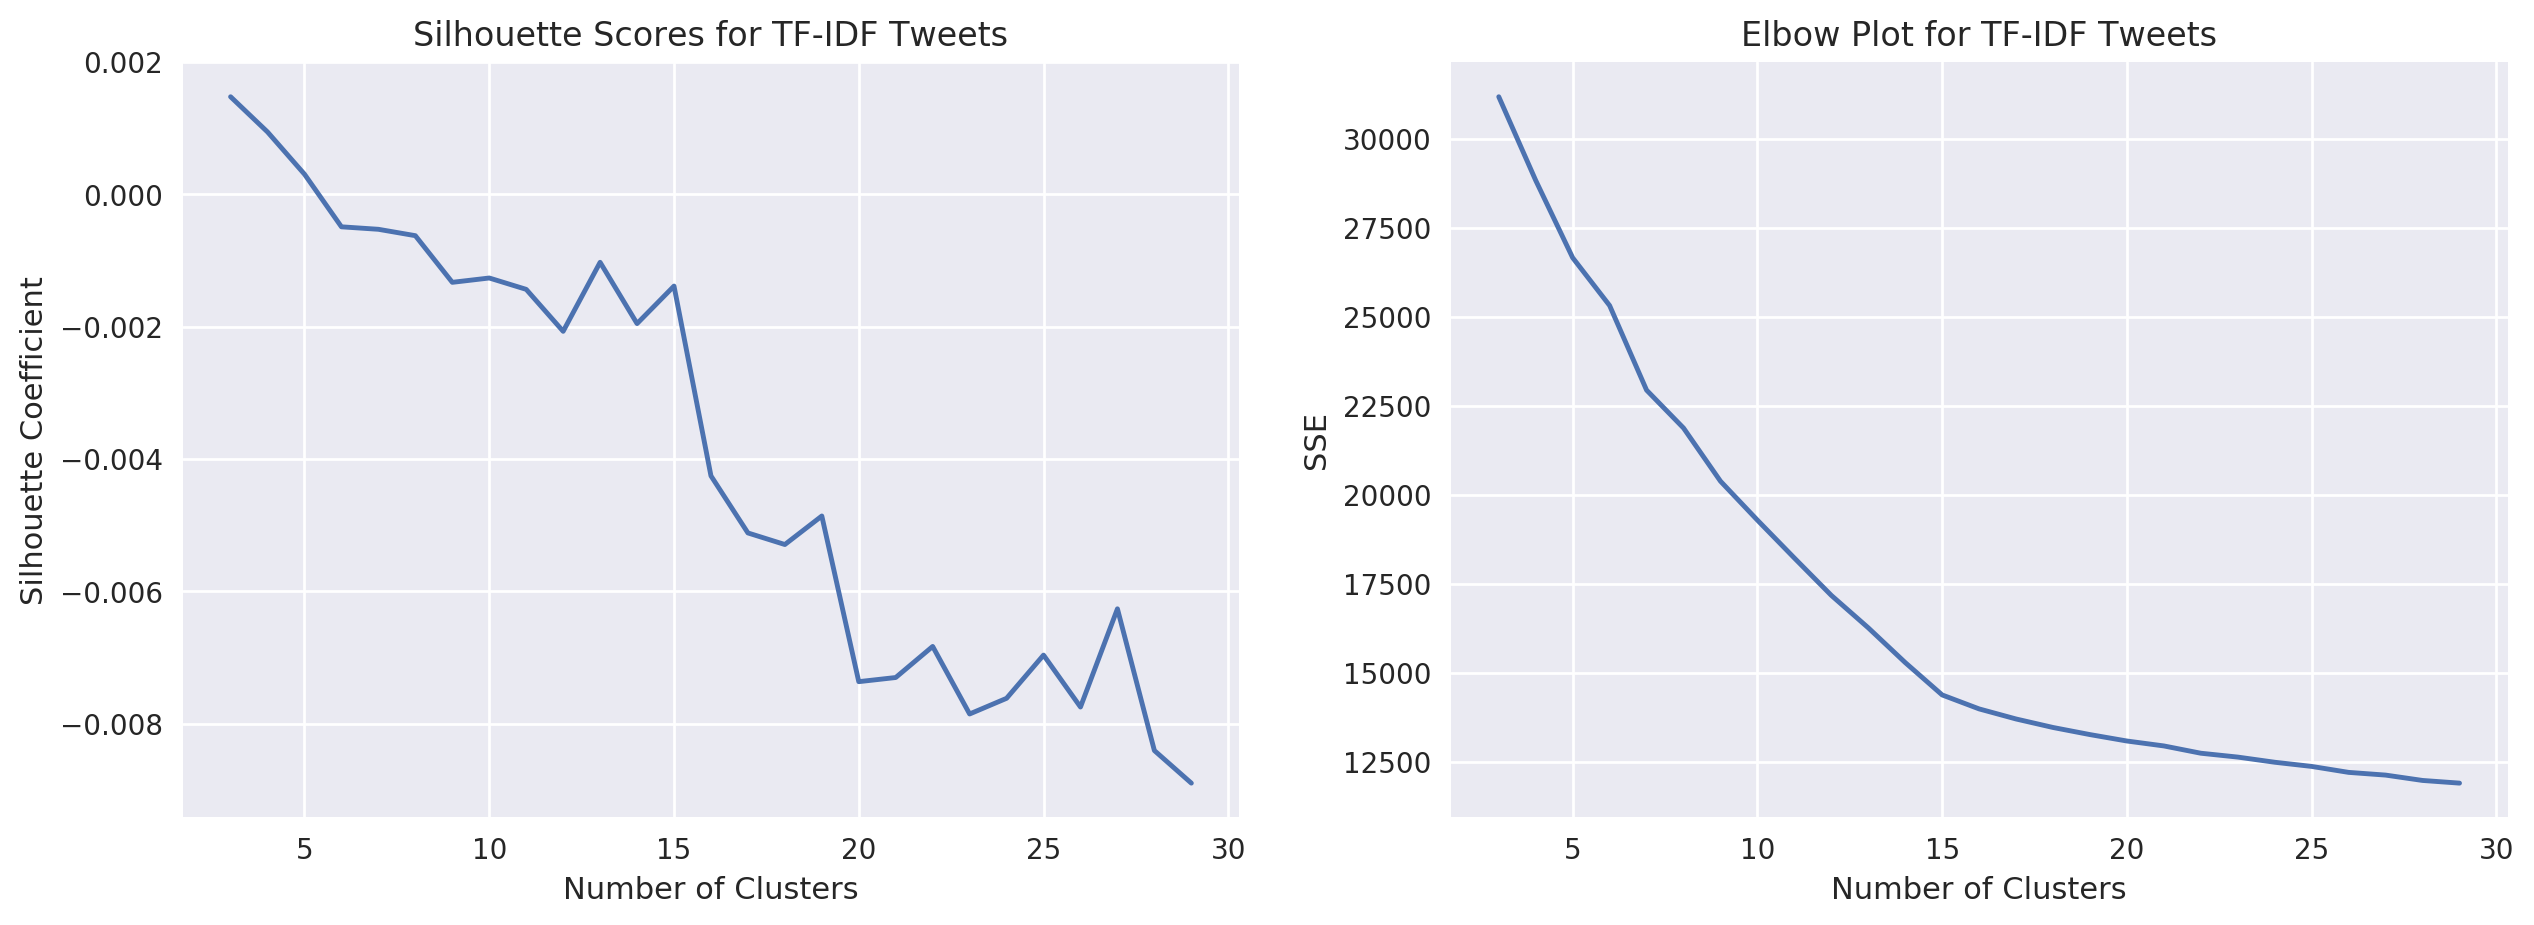

In [17]:
k_clusters = list(k_range)

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5), sharex=True, dpi=200)
ax1.plot(k_clusters, Sil_coefs)
ax1.set_title('Silhouette Scores for TF-IDF Tweets')
ax1.set_xlabel('Number of Clusters')
ax1.set_ylabel('Silhouette Coefficient')

# plot here on ax2
ax2.plot(k_clusters, SSEs)
ax2.set_title('Elbow Plot for TF-IDF Tweets')
ax2.set_xlabel('Number of Clusters')
ax2.set_ylabel('SSE');

In [21]:
# put the LDA probabilites into the df to experiment with visualizing
for idx, column in enumerate(lda_docs_to_train.T):
    clustered_tweets['lda_topic_{}'.format(idx)] = column

clustered_tweets.to_csv('../csvs/km_rt_lda_15_150passes.csv')

In [22]:
import pickle

pickle.dump( lda, open( "../pickled_models/lda_rt_15_150passes.p", "wb" ) )